# Análisis Bivariado e Inferencial

Este notebook se enfoca en el análisis de relaciones entre variables (bivariado) y pruebas estadísticas inferenciales.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo y visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Carga de datos
file_path = 'EV_Energy_Consumption_Cleaned - EV_Energy_Consumption_Cleaned.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset cargado correctamente.")
except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no se encontró. Verifica la ruta.")

# Preprocesamiento básico (replicando pasos de EDA)
# Conversión de variables categóricas
cols_to_categorical = ['Driving_Mode', 'Road_Type', 'Traffic_Condition', 'Weather_Condition']
for col in cols_to_categorical:
    if col in df.columns:
        df[col] = df[col].astype('object')

# Seleccionar columnas numéricas para correlación
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"Columnas numéricas detectadas: {len(numeric_cols)}")

Dataset cargado correctamente.
Columnas numéricas detectadas: 13


## 1. Análisis de Correlación y Relaciones Bivariadas

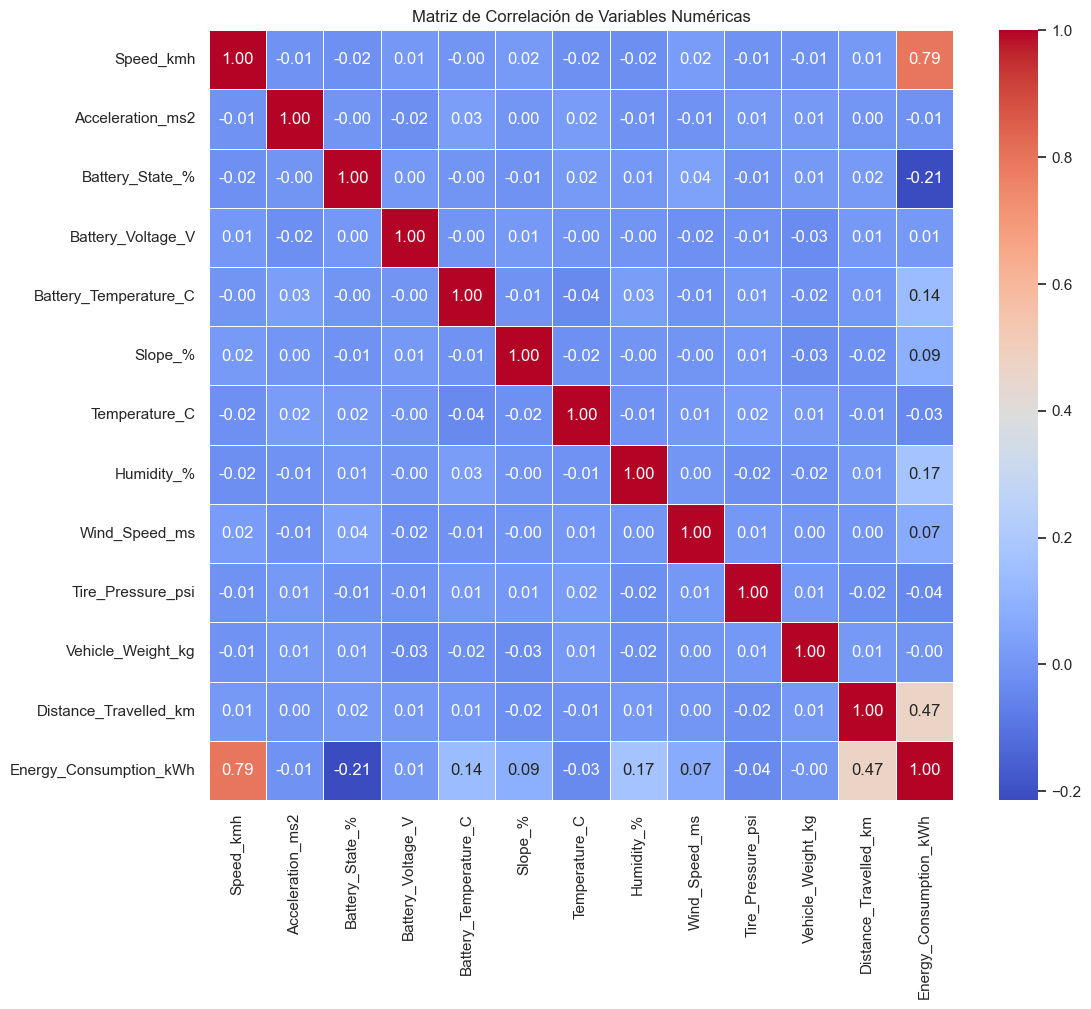

Demasiadas variables para un pairplot completo. Se muestra solo heatmap.


In [2]:
# Matriz de Correlación (Heatmap)
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Pairplot para visualizar relaciones entre pares de variables
if len(numeric_cols) <= 10:
    sns.pairplot(df[numeric_cols])
    plt.suptitle('Pairplot de Variables Numéricas', y=1.02)
    plt.show()
else:
    print("Demasiadas variables para un pairplot completo. Se muestra solo heatmap.")

## 2. Relación con la Variable Objetivo (Energy_Consumption_kWh)

Se analiza la relación visual entre el consumo de energía (`Energy_Consumption_kWh`) y las variables predictoras seleccionadas: `Battery_State_%`, `Humidity_%`, y `Distance_Travelled_km`.

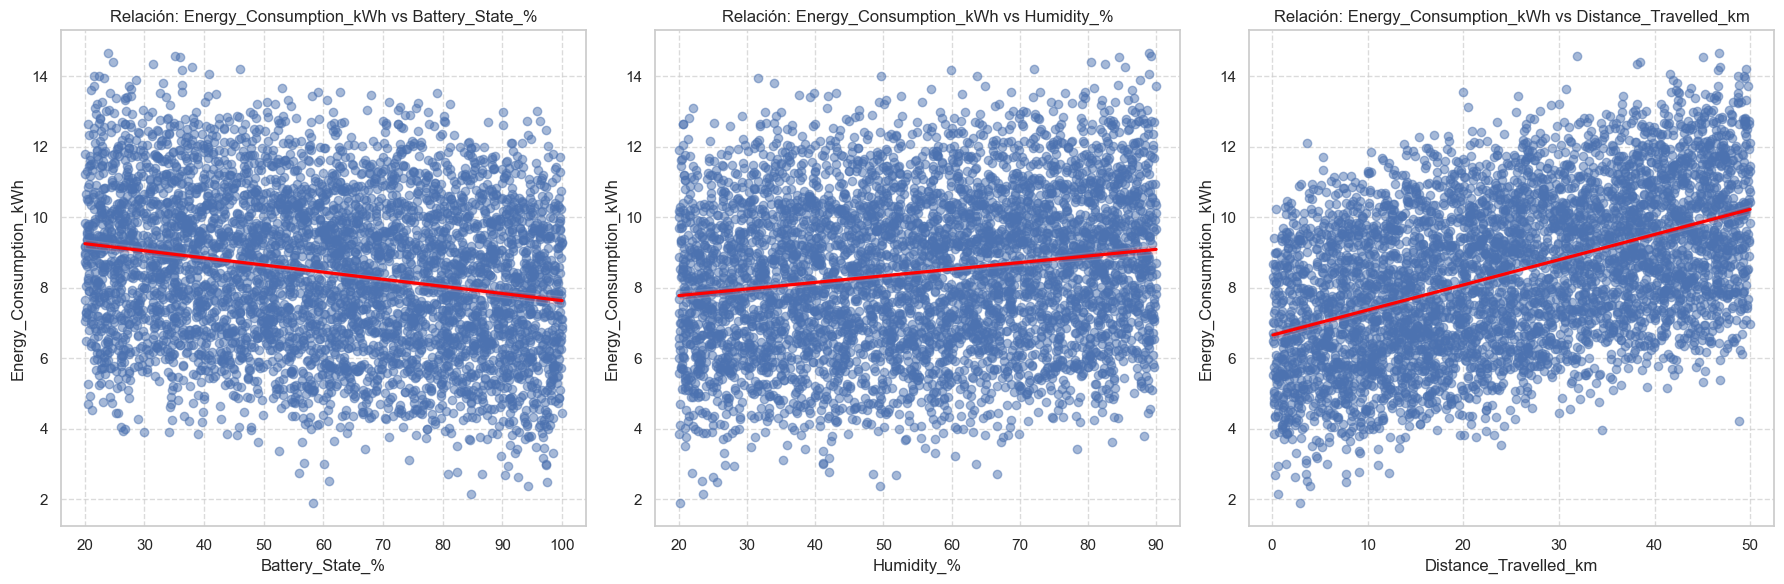

In [3]:
# Variables definidas para el análisis
target_var = 'Energy_Consumption_kWh'
predictor_vars = ['Battery_State_%', 'Humidity_%', 'Distance_Travelled_km']

# Verificar que las columnas existan
vars_to_plot = [var for var in predictor_vars if var in df.columns]

if vars_to_plot:
    plt.figure(figsize=(18, 6))
    for i, col in enumerate(vars_to_plot):
        plt.subplot(1, 3, i + 1)
        # Scatterplot con línea de regresión para ver tendencia
        sns.regplot(data=df, x=col, y=target_var, line_kws={"color": "red"}, scatter_kws={'alpha':0.5})
        plt.title(f'Relación: {target_var} vs {col}')
        plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
else:
    print("Las columnas seleccionadas no se encontraron en el dataset.")

## 3. Pruebas de Hipótesis (Correlación de Pearson)

Se evalúa si existe una correlación lineal estadísticamente significativa entre el consumo de energía y cada variable explicativa.

**Hipótesis:**
*   $H_0: \rho = 0$ (No hay correlación)
*   $H_1: \rho \neq 0$ (Existe correlación significativa)

Nivel de significancia $\alpha = 0.05$.

In [4]:
from scipy import stats

print(f"{'Variable':<30} | {'Correlación (r)':<15} | {'P-valor':<15} | {'Resultado'}")
print("-" * 85)

for col in vars_to_plot:
    # Calcular correlación de Pearson y p-valor
    # Nota: dropna() asegura que no falle si hay nulos
    subset = df[[col, target_var]].dropna()
    r, p_value = stats.pearsonr(subset[col], subset[target_var])
    
    # Interpretación
    significativo = "Rechazo H0 (Significativa)" if p_value < 0.05 else "No rechazo H0 (No signif.)"
    
    print(f"{col:<30} | {r:<15.4f} | {p_value:<15.4e} | {significativo}")

Variable                       | Correlación (r) | P-valor         | Resultado
-------------------------------------------------------------------------------------
Battery_State_%                | -0.2138         | 8.4329e-53      | Rechazo H0 (Significativa)
Humidity_%                     | 0.1730          | 6.9116e-35      | Rechazo H0 (Significativa)
Distance_Travelled_km          | 0.4659          | 7.0178e-268     | Rechazo H0 (Significativa)
